# Importing Libraries

In [43]:
import librosa
import os
import glob
import itertools
from playsound import playsound
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
from librosa.feature import melspectrogram
from librosa.util import normalize
from librosa.display import waveplot

# Setting Directory variables

In [2]:
## Data library

dryCoughData = 'C:/Users/tpaulraj/Dropbox/Projects/Cough Research/Cough-data/Dry_cough/'
wetCoughData = 'C:/Users/tpaulraj/Dropbox/Projects/Cough Research/Cough-data/Wet_cough/'

# Functions

## Read Cough Data

In [3]:
#Read original data

def readCoughData(file):
    origData,origSampFreq = librosa.load(file, sr=None)
    return origData, origSampFreq

## Resample sound array

In [31]:
# resample original data to 16000 Khz

def resample(originalData, origSampFreq, targetSampFreq):
    resampledData = librosa.resample(originalData, origSampFreq, targetSampFreq)
    return resampledData

## Normalize Sound Array

In [5]:
# Normalize Sound Data

def normalizeSound(resampledData, axis):
    """ Axis is 0 for row-wise and 1 
    for column wise"""
    normalizedData = normalize(resampledData, axis)
    return normalizedData

## Calculate Mel-Spectrum

In [6]:
# Calculate Mel-Spectogram

def calculateMelSpectogram(normalizedData, hop_length, win_length, sr):
    #newSamplingFreq = 16000
    S=librosa.feature.melspectrogram(normalizedData, sr=sr, hop_length=hop_length, win_length=win_length)
    return S

## Plotting Sound Data

In [7]:
# plot orginal time domain data

def plotSound(soundData, sr, x_axis_string):
    waveplot(soundData, sr, x_axis=x_axis_string)

## Plotting Mel-Spectogram

In [8]:
#Plot melspectogram

def plotMelSpectogram(S, sr, ref=np.max):
    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=16000,)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

# Combining all the functions above to create a single function

## Setting Target sampling frequency

I decide to set target sampling frequency to 16000 for cough 

In [32]:
def featureExtraction(audioFile, targetSampFreq, axis, hop_length,win_length):
    y, y_sr = readCoughData(file=audioFile)
    print(y, y_sr)
    resampledData = resample(originalData=y, origSampFreq=y_sr, targetSampFreq=targetSampFreq)
    normalizedData = normalizeSound(resampledData, axis=axis)
    S = calculateMelSpectogram(normalizedData=normalizedData, hop_length=hop_length, win_length=win_length, sr=targetSampFreq)
    plotSound(soundData=normalizedData, sr=targetSampFreq,x_axis_string='time')
    plotMelSpectogram(S, sr=targetSampFreq, ref=np.max)
    return S

In [10]:
import tensorflow as tf
import h5py
import numpy as np
import pandas as pd
from tensorflow.python.keras import backend as K
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Activation, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop

In [11]:
def cough_detection_model():
    input_layer = Input((432,228,1))
    x = MaxPooling2D(pool_size=(2, 2))(input_layer)
    x = Conv2D(filters=32,kernel_size=(5,5),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=32,kernel_size=(5,5),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(input_layer)
    x = Flatten()(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(2,activation = 'softmax')(x)
    model = Model(inputs=input_layer,outputs=output_layer)
    adam = Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [12]:
def one_hot(a):
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b
X_train =                         # load your data here shape (80,100,50)
X_train = X_train.reshape((80,100,50,1))
y_train =                         # load your labels here shape (80,1)
y_train = one_hot(y_train)                       # one_hot_encoding
number_of_epochs = 50 # number of times you fed each data on X_train to the model
#model = cough_detection_model() # here you have to call the model you want to use, in this case DL_MC
model = cough_detection_model()
print('# Fit model on training data')
history = model.fit(X_train, y_train,
                    batch_size = 4,
                    epochs = number_of_epochs, validation_data = (X_train,y_train)) #I have set same data for training and
                                                # for validation because we have few instances, later when we have
                                                #more data we will make an split train/validation/test
print('\nhistory dict:', history.history)

SyntaxError: invalid syntax (<ipython-input-12-4aad266b40c2>, line 5)

In [13]:
trainingDataDirectory = 'C:\\Users\\tpaulraj\\Dropbox\\Projects\\Cough Research\\Cough-signal-processing\\Notebook Examples\\Data\\Training Data'
dirList = os.listdir(trainingDataDirectory)
soundfiles=[]
featureArray = np.zeros((200,128,1259)) #array to store features
classArray = np.zeros((200,1)) #array to store classes

In [14]:
for dir in dirList:
    currentDirFile = glob.glob(trainingDataDirectory+'\\'+dir+'\\'+'*')
    soundfiles.append(currentDirFile)

In [15]:
# Flattenning soundfiles list into a single list

listOfAllSoundFiles=list(itertools.chain(*soundfiles))

In [16]:
shuffle(listOfAllSoundFiles)

In [17]:
#creating classes labels......
for i in range(len(listOfAllSoundFiles)):
    if (listOfAllSoundFiles[i].split('\\')[-2] == 'Coughing'):
        classArray[i] = 1
    else:
        classArray[i] = 0

In [35]:
listOfAllSoundFiles[0:5]

['C:\\Users\\tpaulraj\\Dropbox\\Projects\\Cough Research\\Cough-signal-processing\\Notebook Examples\\Data\\Training Data\\Laughing\\2-60795-A.ogg',
 'C:\\Users\\tpaulraj\\Dropbox\\Projects\\Cough Research\\Cough-signal-processing\\Notebook Examples\\Data\\Training Data\\Laughing\\1-72695-A.ogg',
 'C:\\Users\\tpaulraj\\Dropbox\\Projects\\Cough Research\\Cough-signal-processing\\Notebook Examples\\Data\\Training Data\\Coughing\\3-125418-A.ogg',
 'C:\\Users\\tpaulraj\\Dropbox\\Projects\\Cough Research\\Cough-signal-processing\\Notebook Examples\\Data\\Training Data\\Snoring\\5-216368-A.ogg',
 'C:\\Users\\tpaulraj\\Dropbox\\Projects\\Cough Research\\Cough-signal-processing\\Notebook Examples\\Data\\Training Data\\Breathing\\3-144128-A.ogg']

In [45]:
r= listOfAllSoundFiles[2]
playsound(r)

PlaysoundException: 
    Error 310 for command:
        open "C:\Users\tpaulraj\Dropbox\Projects\Cough Research\Cough-signal-processing\Notebook Examples\Data\Training Data\Coughing\3-125418-A.ogg" alias playsound_0.9512379047130495
    Specify a device or driver name that is less than 79 characters.

[0.06448855 0.06213615 0.05945783 ... 0.01809517 0.01508714 0.01231538] 44100


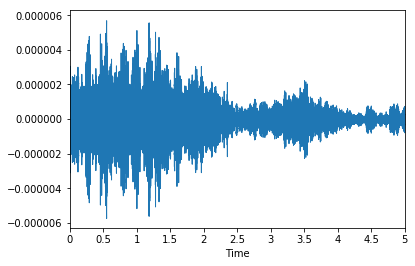

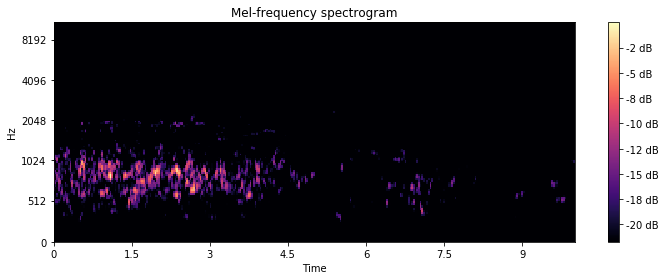

(128, 313)
[ 0.00023975 -0.0004543  -0.00041737 ... -0.00025359  0.00023153
  0.00017311] 44100


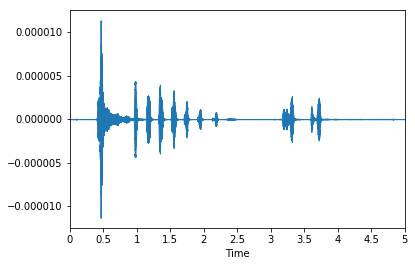

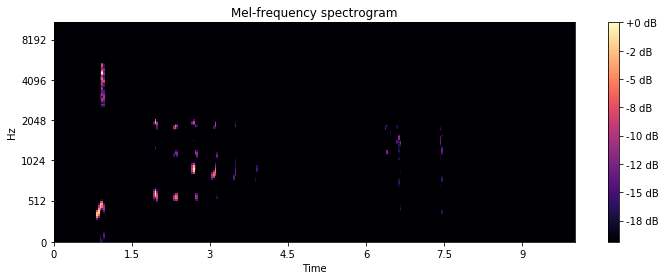

(128, 313)
[0.09740109 0.09542079 0.09197009 ... 0.         0.         0.        ] 44100


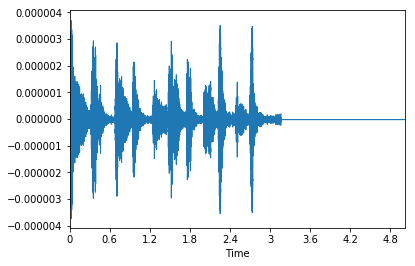

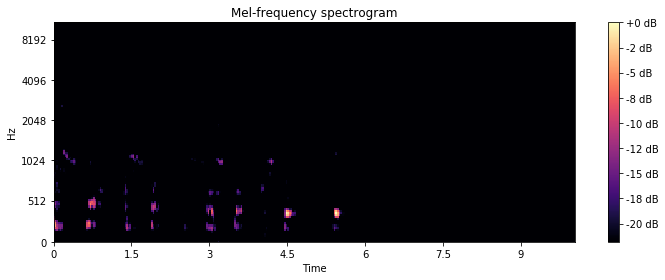

(128, 314)
[ 0.00020483  0.00587577  0.01054204 ... -0.00012427 -0.00027374
 -0.00024812] 44100


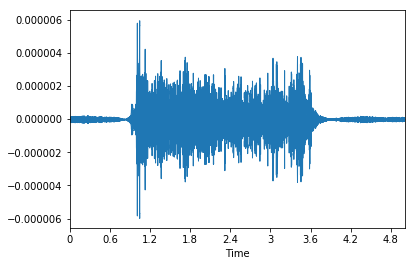

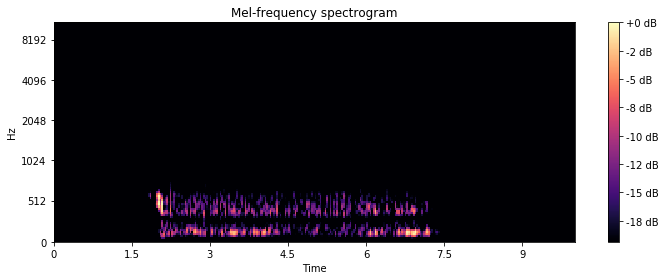

(128, 313)
[ 0.01364263  0.01710883  0.01670155 ... -0.00526308 -0.00486098
 -0.00245204] 44100


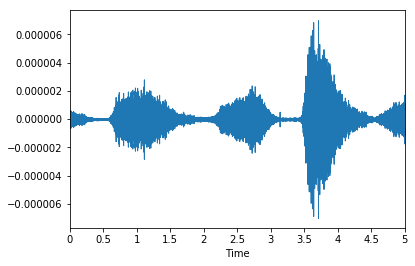

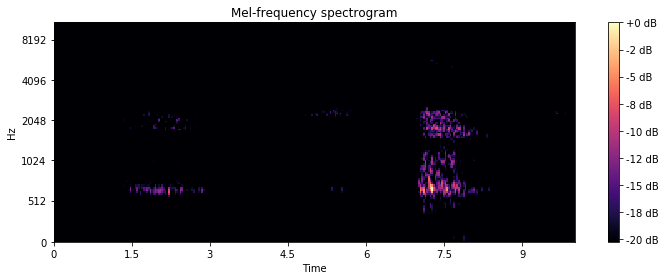

(128, 313)


In [46]:
for file in listOfAllSoundFiles[0:5]:
    feat = featureExtraction(audioFile=file,targetSampFreq=16000, axis=0, hop_length=256, win_length=512)
    print(feat.shape)